In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

img = cv2.imread('/content/peppers.png')


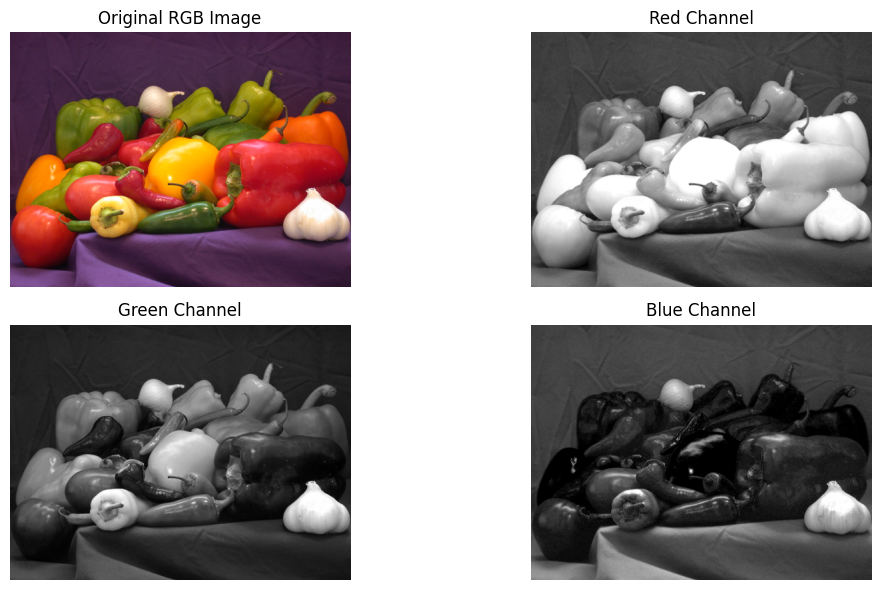

In [26]:
# Convert BGR to RGB for Matplotlib display

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split the image into its R, G, B channels
b, g, r = cv2.split(img)

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Original RGB image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.axis('off')

# Red Channel
plt.subplot(2, 2, 2)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Green Channel
plt.subplot(2, 2, 3)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Blue Channel
plt.subplot(2, 2, 4)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

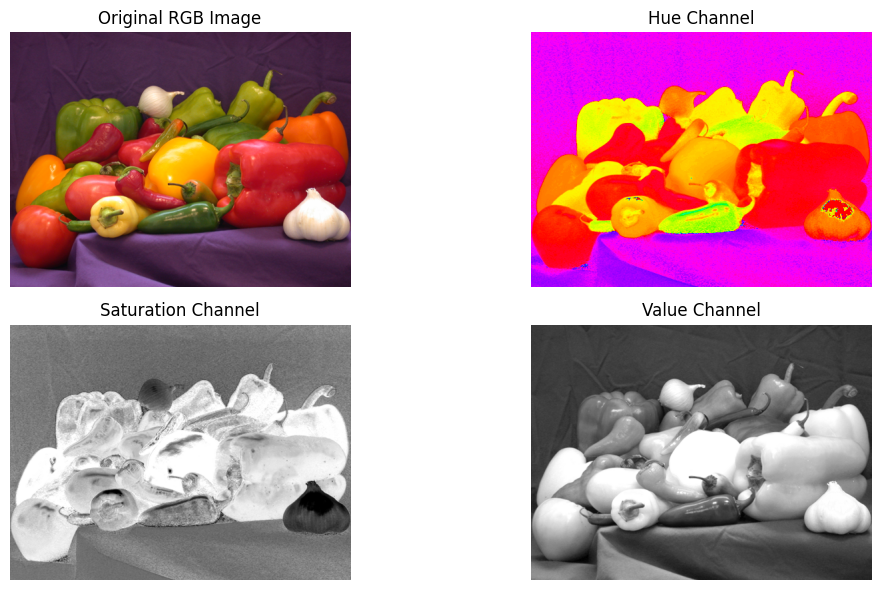

In [27]:
img = cv2.imread('/content/peppers.png')

# Convert BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the HSV image into H, S, V channels
h, s, v = cv2.split(img_hsv)

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Original RGB image (for comparison)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.axis('off')

# Hue Channel
plt.subplot(2, 2, 2)
plt.imshow(h, cmap='hsv') # Hue is often visualized with an HSV colormap
plt.title('Hue Channel')
plt.axis('off')

# Saturation Channel
plt.subplot(2, 2, 3)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value Channel
plt.subplot(2, 2, 4)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_cmy(img_rgb):
    """Convert RGB image to CMY."""
    c = 1 - img_rgb[:, :, 0] / 255.0
    m = 1 - img_rgb[:, :, 1] / 255.0
    y = 1 - img_rgb[:, :, 2] / 255.0
    return c, m, y

def rgb_to_cmyk(img_rgb):
    """Convert RGB image to CMYK."""
    R = img_rgb[:, :, 0] / 255.0
    G = img_rgb[:, :, 1] / 255.0
    B = img_rgb[:, :, 2] / 255.0

    K = 1 - np.max([R, G, B], axis=0)
    denom = 1 - K + 1e-8  # prevent division by zero
    C = (1 - R - K) / denom
    M = (1 - G - K) / denom
    Y = (1 - B - K) / denom

    # Clamp between 0 and 1
    C = np.clip(C, 0, 1)
    M = np.clip(M, 0, 1)
    Y = np.clip(Y, 0, 1)
    K = np.clip(K, 0, 1)

    return C, M, Y, K


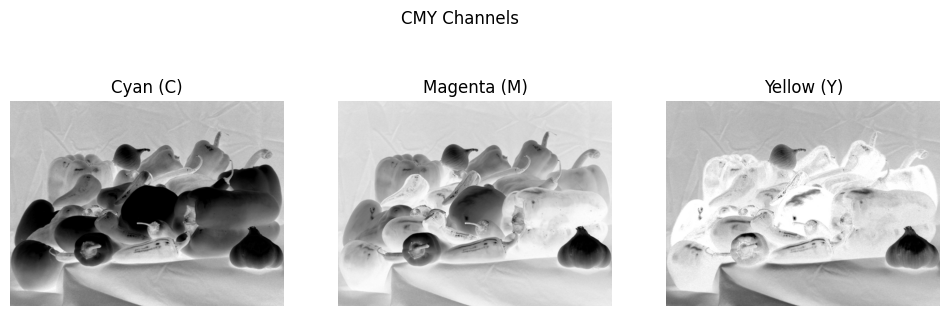

In [12]:
def show_channel(channel, title):
    """Display a single channel."""
    plt.imshow(channel, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Load the image
img_bgr = cv2.imread('/content/peppers.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert to CMY and CMYK
C, M, Y = rgb_to_cmy(img_rgb)
Ck, Mk, Yk, K = rgb_to_cmyk(img_rgb)

# Plot CMY channels
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
show_channel(C, 'Cyan (C)')

plt.subplot(1, 3, 2)
show_channel(M, 'Magenta (M)')

plt.subplot(1, 3, 3)
show_channel(Y, 'Yellow (Y)')

plt.suptitle('CMY Channels')
plt.show()


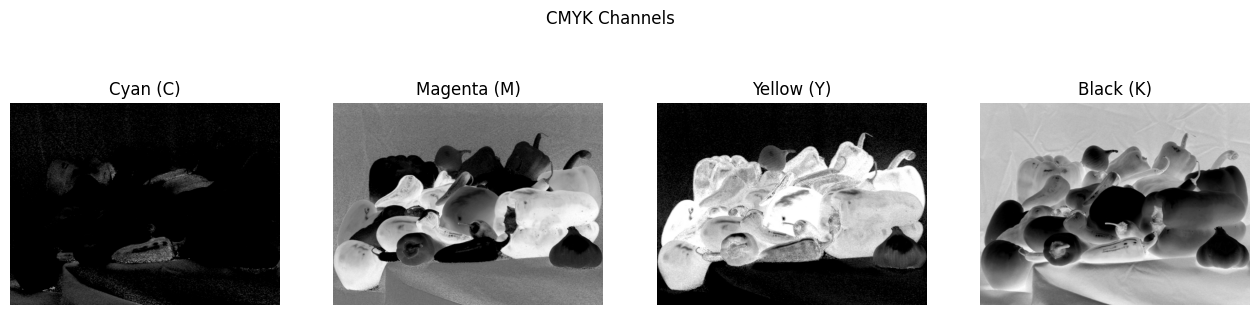

In [13]:

# Plot CMYK channels
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
show_channel(Ck, 'Cyan (C)')

plt.subplot(1, 4, 2)
show_channel(Mk, 'Magenta (M)')

plt.subplot(1, 4, 3)
show_channel(Yk, 'Yellow (Y)')

plt.subplot(1, 4, 4)
show_channel(K, 'Black (K)')

plt.suptitle('CMYK Channels')
plt.show()


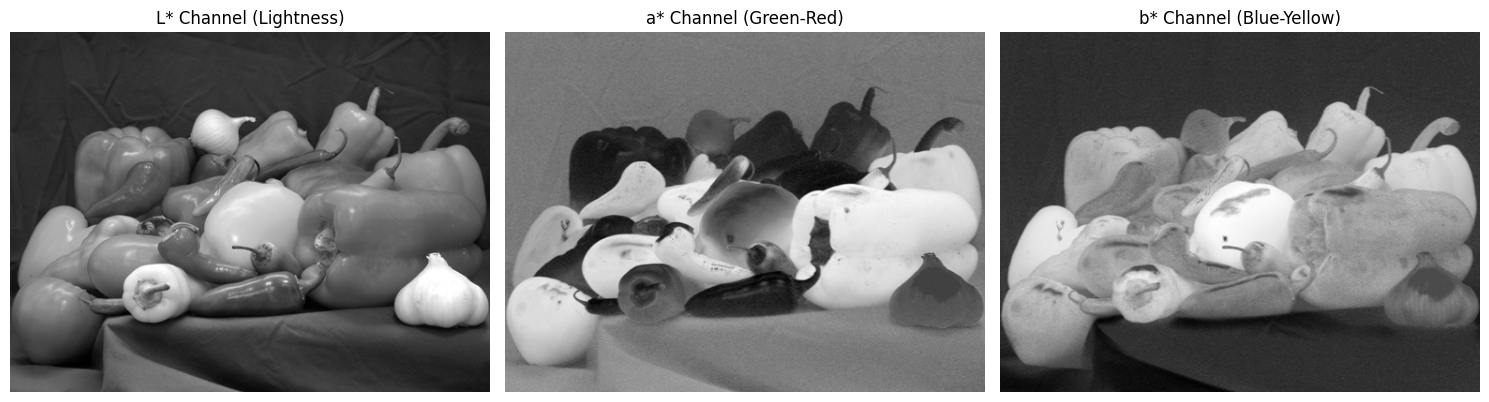

In [28]:

image = cv2.imread('/content/peppers.png')

# Convert BGR (OpenCV default) to RGB
if image.shape[-1] == 3:  # Check if color image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
else:  # Grayscale image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Convert RGB to L*a*b*

# Using scikit-image
lab_image = color.rgb2lab(image_rgb)  # L*: 0-100, a*,b*: approx -128 to 127

# Using OpenCV
lab_image_cv2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)  # L*:0-255, a*:0-255, b*:0-255

# Extract L*, a*, b* channels from scikit-image conversion
l_channel = lab_image[:, :, 0]
a_channel = lab_image[:, :, 1]
b_channel = lab_image[:, :, 2]

# Plot the channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# L* channel
axes[0].imshow(l_channel, cmap='gray')
axes[0].set_title('L* Channel (Lightness)')
axes[0].axis('off')

# a* channel
axes[1].imshow(a_channel, cmap='gray')
axes[1].set_title('a* Channel (Green-Red)')
axes[1].axis('off')

# b* channel
axes[2].imshow(b_channel, cmap='gray')
axes[2].set_title('b* Channel (Blue-Yellow)')
axes[2].axis('off')

plt.tight_layout()
plt.show()
